# `Product Ratings Prediction`

### Problem Statement:-
After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.

Follow the complete life cycle of data science. Include all the steps like,
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

Column Information:

- Review_title : title of the review
- Review_text : content of the review text
- Ratings : ratings are out of 5 stars

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing NLP libraries:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)


## importing warnings:
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## Load the Dataset:

In [4]:
df=pd.read_csv(r"Product_Ratings_DataSheet.csv")
df.sample(10)

,Unnamed: 0,Ratings,Review_Text,Summary
34469,12185,2.0 out of 5 stars,Not a good product as show in specifications,\r\n Not good\r\n
55766,5080,4.0 out of 5 stars,When you install more apps response is slow,\r\n If you are using lots of apps pl don't b...
33245,4546,2.0 out of 5 stars,Not upto exceptions not worth for &gt; 20k,\r\n Display brightness automatically not cha...
36837,27474,2.0 out of 5 stars,Connection is good but not an updated one,"\r\n While attaching two ear buds, the music ..."
41173,9090,1.0 out of 5 stars,It's a crap with lot of unnecessary junk appl...,\r\n Samsung is forcing the user to install ...
53890,39420,3.0 out of 5 stars,Display not as given in description,\r\n This brand says that this watch has the ...
21411,21411,5,Good 👍,Super!
2337,2337,5,Perfect in this price range. Go for it,Brilliant
41402,10316,1.0 out of 5 stars,Worst ever phone. I want to replaCe.,\r\n Very poor camera quality. Worse than M31...
30453,30453,1,Very Bad Quality.. battery cannot keep properly..,Horrible


In [5]:
## Checking the shape of our dataset:
df.shape

(56242, 4)

We have 56242 records and 4 columns including target variable.

# `EDA`

As we can see that 'Unnamed:0' column present in our dataset, which will be a kind of serial no. so it will not add any value in our model. So we will drop it right now.

In [6]:
df.drop(columns = 'Unnamed: 0', inplace = True)


### Checking Missing Values:

In [7]:
df.isna().sum()

Ratings          0
Review_Text      2
Summary        116
dtype: int64

- There are some features having missing values. As we see that the number of missing values are too low.
- So it is good to fill them we will  drop them, as it will not effect our dataset.

In [8]:
## Droppping Nans
df.dropna(inplace=True)
df.shape

(56124, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56124 entries, 0 to 56241
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      56124 non-null  object
 1   Review_Text  56124 non-null  object
 2   Summary      56124 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


### Observations:-
- There are no null values present in our dataset.
- Our target variable i.e. 'Ratings' is Integer datatype, and other both variables is text data type.

In [10]:
df['Ratings'].unique()

array(['5', '4', '3', '1', '2', '2.0 out of 5 stars',
       '1.0 out of 5 stars', '3.0 out of 5 stars', '4.0 out of 5 stars'],
      dtype=object)

As we can see at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)

In [11]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].value_counts()

5    19941
1    11596
3     9117
4     7931
2     7539
Name: Ratings, dtype: int64

In [12]:
df['Ratings'].value_counts()

5    19941
1    11596
3     9117
4     7931
2     7539
Name: Ratings, dtype: int64

##### Now combining the "Review_title" and "Review_text" columns into one single column called "Review"

In [13]:
df['Full_Review'] = df['Summary'].map(str)+' '+df['Review_Text']
df

,Ratings,Review_Text,Summary,Full_Review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,Best in the market! Mannn this is just incredi...
1,5,This laptop is soo good and I bought it after ...,Brilliant,Brilliant This laptop is soo good and I bought...
2,5,Amazing laptop just great i bought this produc...,Brilliant,Brilliant Amazing laptop just great i bought t...
3,5,Brought this laptop after fair bit of research...,Terrific,Terrific Brought this laptop after fair bit of...
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,Mind-blowing purchase 11400 Has Much Better Si...
...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,\r\n Very nice\r\n Good
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,\r\n Screen quality<br>Picture Clarity is ver...
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n","\r\n Good phone, battery drain fast.\r\n Over..."
56240,4,Good product,\r\n Very very like\r\n,\r\n Very very like\r\n Good product


#### Now we will check the first 10 Full review and understand the structure and overview of reviews...

In [14]:
for i in range(10):
    print(df.Full_Review[i])
    print("\n**********Next Review*********\n")    

Best in the market! Mannn this is just incredible 😍 i was scared of online payment this is my first time with my dream laptop 😍 very happy to see the awesome product quality 😀 i5 11400H + RTX 3050 is insaaanneee and you ill get 1tb SSD / great build quality / GAMEPLAY ARE JUST MIND-BLOWING 😵 gives more performance than ryzen 7 4800h & ryzen 5 5600h trust me I've buy this one by comparing all those cpu's / 90whr battery in this segment are totaly nice 😍 just go for this product 😀😊

**********Next Review*********

Brilliant This laptop is soo good and I bought it after a lot of research.
Excellent build quality , all plastic but super tuf.
I bought it for video editing and casual gaming , and boy this performs well above my expectations.
Pros..
Cpu 11400h is a very good cpu, almost as fast as last generation i9 . Rtx 3050 is performing good in gaming and 4k video editing.
1 tb ssd is there so no worries about storage.
Rgb keyboard looks good 👍
Best part is trackpad , its soo smooth to wo

### Observations:
- We can see that our reviews holds many emojies, our model will not understand to these emojies so we have to handle them.
- There are many special character used like -,:,:,...,@,(,) etc.
- Some words are in Capital letters and some are small letters.


### Removing Emojies

In [15]:
#pip install clean-text

In [16]:
## importing clean function
from cleantext import clean


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [17]:
Full_review=[]
for i in df.Full_Review:
    #appending text after removing the emojis from it
    Full_review.append(clean(i, no_emoji=True))

In [18]:
## Dropping Full review from dataframe
df.drop('Full_Review',axis=1,inplace=True)

### Adding without emojies column in our dataframe
df['Full_review']=Full_review


In [20]:
df

,Ratings,Review_Text,Summary,Full_review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best in the market! mannn this is just incredi...
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant this laptop is soo good and i bought...
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop just great i bought t...
3,5,Brought this laptop after fair bit of research...,Terrific,terrific brought this laptop after fair bit of...
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mind-blowing purchase 11400 has much better si...
...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,very nice\ngood
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,screen quality<br>picture clarity is very good...
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n","good phone, battery drain fast.\noverall good ..."
56240,4,Good product,\r\n Very very like\r\n,very very like\ngood product


It looks great now...!!!

Now,  I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text.

In [21]:
def unwanted_text(string):
    string = re.sub(r"won't", "will not",string)
    string = re.sub(r"don’t", "do not",string)
    string = re.sub(r"doesn’t", "does not",string)
    string= re.sub(r"haven’t", "have not", string)
    string = re.sub(r"can't", "can not", string)
    string = re.sub(r"im ", "i am", string)
    string = re.sub(r"yo ", "you ",string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"<br>", " ", string)
    ##removing all the urls:
    string = re.sub(r'http\S+', '', string) 
    return string

In [22]:
## # Lowercasing the words in review
df['Full_review'] = df['Full_review'].apply(lambda x : x.lower())

In [23]:
## Decontracted all the reviews
df['Full_review'] = df['Full_review'].apply(lambda x : unwanted_text(x))

In [27]:
### Removing Special charactors
charactors=['.',':',';','(',')','!','@','$','^','[^\w\s]','/','?','<','>']
for i in charactors:
    df['Full_review'] = df['Full_review'].str.replace(i,'')

In [28]:
space_key=['\n','_','-']
for j in space_key:
    df['Full_review'] = df['Full_review'].str.replace(j,' ')

In [29]:
# Removing all the stopwords
stop_charactors = stopwords.words('english')
df['Full_review'] = df['Full_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))

#### Now checking again the Reviews:-

In [30]:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incredible scared online payment first time dream laptop happy see awesome product quality i5 11400h rtx 3050 insaaanneee ill get 1tb ssd great build quality gameplay mindblowing gives performance ryzen 7 4800h ryzen 5 5600h trust buy one comparing cpu 90whr battery segment totaly nice go product

**********Next Review*********

brilliant laptop soo good bought lot research excellent build quality plastic super tuf bought video editing casual gaming boy performs well expectations pros cpu 11400h good cpu almost fast last generation i9 rtx 3050 performing good gaming 4k video editing 1 tb ssd worries storage rgb keyboard looks good best part trackpad soo smooth work laptop h read

**********Next Review*********

brilliant amazing laptop great bought product diwali sale used sbi credit card bought product 69k totally worth best products gamers mechanical students widely use softwares like solidworks ansys etc

**********Next Review*********

terrific brought laptop fair

##### ` Our Customer's reviews looking Fine now.

### Data Preprocessing:-


### Let's Remove unwanted Characters, numbers and symbols

In [31]:
df['Full_review'] = df['Full_review'].str.replace("[^a-zA-Z#]", " ")

In [32]:
new_df=df.copy()

In [34]:
#importing librabries
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemination = nltk.stem.WordNetLemmatizer()

### Printing Top Occuring Word in Review:

In [35]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

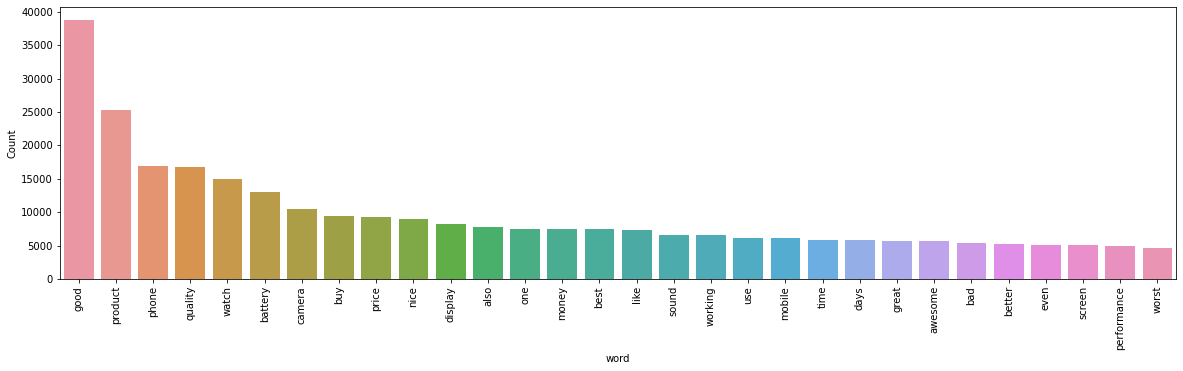

In [36]:
freq_words(df['Full_review'])

- we have printed the most accuring 20 words in our dataset.
- As we can see that the word 'good' is accuring most of the time.

## Printing Rarely Occurinng Word in Review:-

In [37]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nsmallest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

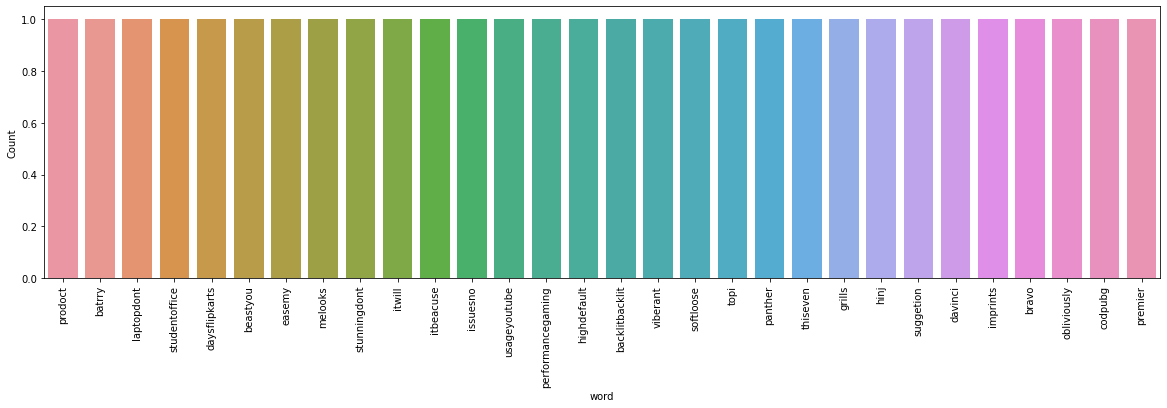

In [38]:
freq_words(df['Full_review'])

### `Lemmatization`

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [39]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemination.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Full_review'] = df['Full_review'].apply(lambda x : lemmatize_sentence(x))

In [40]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incredible scared online payment first time dream laptop happy see awesome product quality i h rtx insaaanneee ill get tb ssd great build quality gameplay mindblowing give performance ryzen h ryzen h trust buy one compare cpu whr battery segment totaly nice go product

**********Next Review*********

brilliant laptop soo good buy lot research excellent build quality plastic super tuf buy video edit casual gaming boy performs well expectation pro cpu h good cpu almost fast last generation i rtx perform good gaming k video edit tb ssd worry storage rgb keyboard look good best part trackpad soo smooth work laptop h read

**********Next Review*********

brilliant amazing laptop great buy product diwali sale use sbi credit card buy product k totally worth best product gamers mechanical student widely use software like solidworks ansys etc

**********Next Review*********

terrific bring laptop fair bit research arguablythe best performance per money market impress build qua

## `Normalization:`

In [41]:
## scraping noise text:
def scrap(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Full_review'] = df['Full_review'].apply(lambda x : scrap(x))

In [42]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incredible scared online payment first time dream laptop happy see awesome product quality i h rtx insaaanneee ill get tb ssd great build quality gameplay mindblowing give performance ryzen h ryzen h trust buy one compare cpu whr battery segment totaly nice go product

**********Next Review*********

brilliant laptop soo good buy lot research excellent build quality plastic super tuf buy video edit casual gaming boy performs well expectation pro cpu h good cpu almost fast last generation i rtx perform good gaming k video edit tb ssd worry storage rgb keyboard look good best part trackpad soo smooth work laptop h read

**********Next Review*********

brilliant amazing laptop great buy product diwali sale use sbi credit card buy product k totally worth best product gamers mechanical student widely use software like solidworks ansys etc

**********Next Review*********

terrific bring laptop fair bit research arguablythe best performance per money market impress build qua

## Counting the Words in 'Full_review':

In [43]:
# Creating column for word counts in the review text
df['new_review'] = df['Full_review'].apply(lambda x: len(str(x).split(' ')))
df.head(10)

,Ratings,Review_Text,Summary,Full_review,new_review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incredible scared online pay...,47
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop great buy product diw...,29
3,5,Brought this laptop after fair bit of research...,Terrific,terrific bring laptop fair bit research arguab...,22
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblowing purchase much well single core per...,24
5,5,Great laptop with all the features exclusive!\...,Just wow!,wow great laptop feature exclusive compare asu...,22
6,5,The best performance.\n\nI searched a lot befo...,Excellent,excellent best performance search lot buy lapt...,52
7,5,Value for money in this price segment...laptop...,Just wow!,wow value money price segmentlaptop similar sp...,46
8,5,I am reviewing this laptop after 16 days of us...,Terrific,terrific review laptop day use performance tre...,50
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant,brilliant awesome laptop good perfomance batte...,22


## `Visualization:-`

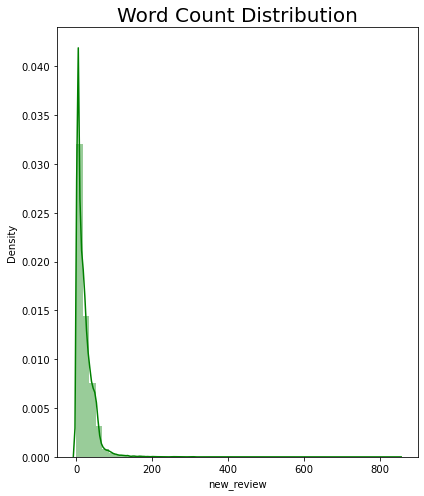

In [44]:
### Let's visulaize our word count first:
plt.figure(figsize=(6,7))
sns.distplot(df['new_review'], kde=True,color='green')
plt.title('Word Count Distribution',fontsize=20)
plt.tight_layout()

- As we can see that most of the words are accuring 0 to 10 times range.
- Word counts is highly right skewed.

### Character count in Review:

In [45]:
df['Review_character_count'] = df['Full_review'].str.len()
df.head(10)

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incredible scared online pay...,47,286
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56,322
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop great buy product diw...,29,187
3,5,Brought this laptop after fair bit of research...,Terrific,terrific bring laptop fair bit research arguab...,22,164
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblowing purchase much well single core per...,24,154
5,5,Great laptop with all the features exclusive!\...,Just wow!,wow great laptop feature exclusive compare asu...,22,131
6,5,The best performance.\n\nI searched a lot befo...,Excellent,excellent best performance search lot buy lapt...,52,320
7,5,Value for money in this price segment...laptop...,Just wow!,wow value money price segmentlaptop similar sp...,46,309
8,5,I am reviewing this laptop after 16 days of us...,Terrific,terrific review laptop day use performance tre...,50,303
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant,brilliant awesome laptop good perfomance batte...,22,148


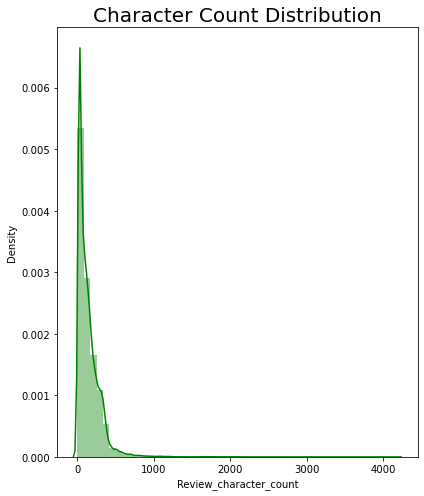

In [46]:
### Let's visulaize our character count first:
plt.figure(figsize=(6,7))
sns.distplot(df['Review_character_count'], kde=True,color='green')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

## Handling Outliers Using Zscore:-

In [47]:
from scipy import stats
from scipy.stats import zscore

In [48]:
z_score=zscore(df[['new_review']])
abs_zscore=np.abs(z_score)

In [49]:
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=df[new_entry]
print("The shape before: ", df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (56124, 6)
The shape after:  (55348, 6)


### Checking Our Target variable is Balanced or not??

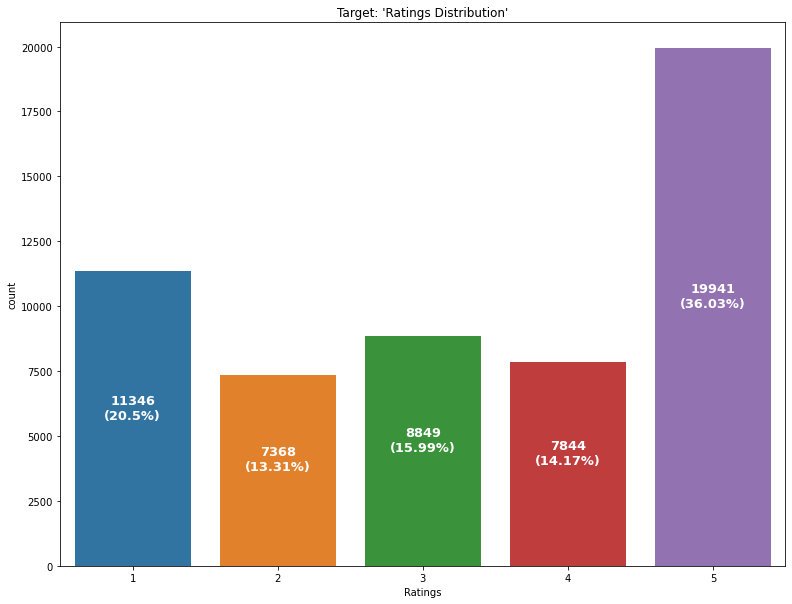

In [50]:
fig, ax = plt.subplots(1,1,figsize=(13,10))
sns.countplot(x='Ratings',data=df_new,ax=ax)
count=0
for i in ax.patches:
    x = i.get_height()/2
    height = i.get_height()
    ratio = round(height*100/len(df_new),2)
    prn = f"{height}\n({ratio}%)"
    ax.text(count,x,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    count += 1
    
plt.title("Target: 'Ratings Distribution'")
plt.show()

- As we can see that 5 Star rating received by most of the customers.
- However we see a high 1 star rating as well compared to 2 and 3 star rating reviews.
- But the count of 2 star and 3 star ratings received from customers is very low. so we have to handle it accordingly.

5    19941
1    11346
3     8849
4     7844
2     7368
Name: Ratings, dtype: int64


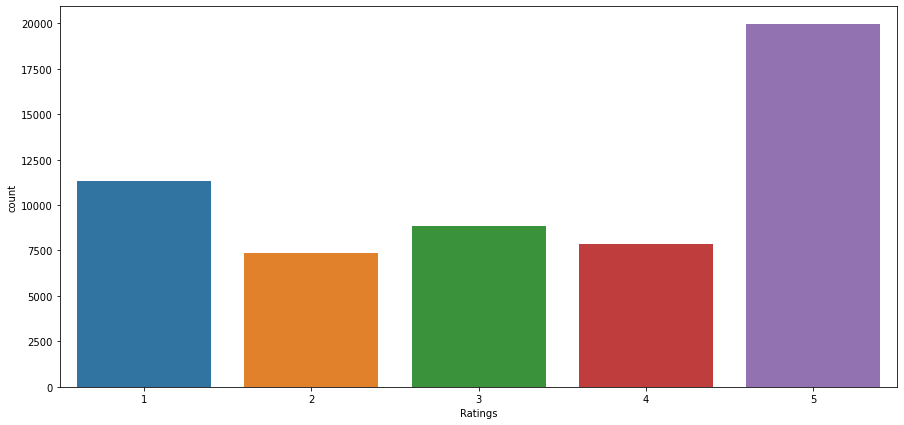

In [51]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df_new['Ratings'])
print(df_new.Ratings.value_counts())
plt.show()

- If we failed to handle this problem then the model will become a disaster because modeling using class-imbalanced data is biased in favor of the majority class.
- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star and 3 star.
- Which will cause the Imbalance problem for our Machine Learning model and make it bias.So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart).Then I will select equal number of data of every category and ensure that the rating values are balanced.

## # Checking review word count distribution for each rating:-

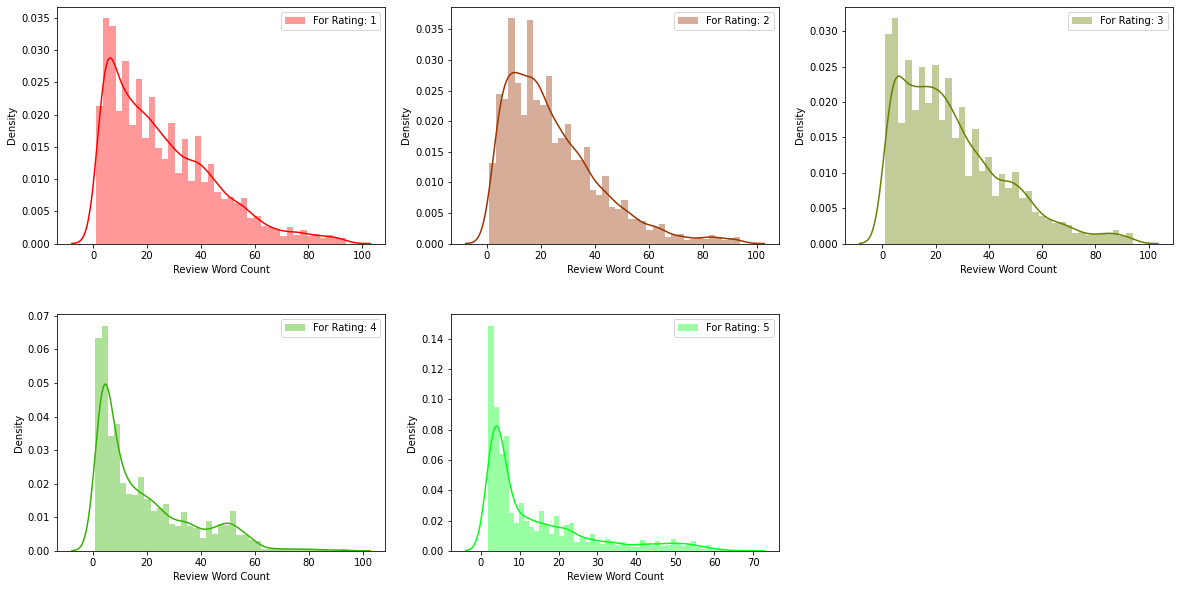

In [53]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
count = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.new_review[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    count += 1
    
plt.show()

- We noticed that every type of ratings word count distribution is highly right skewed.
-  Also we see that most of the word count falling in the range of  0 to 10. 

### Similarly Checking review character count distribution for each rating:-

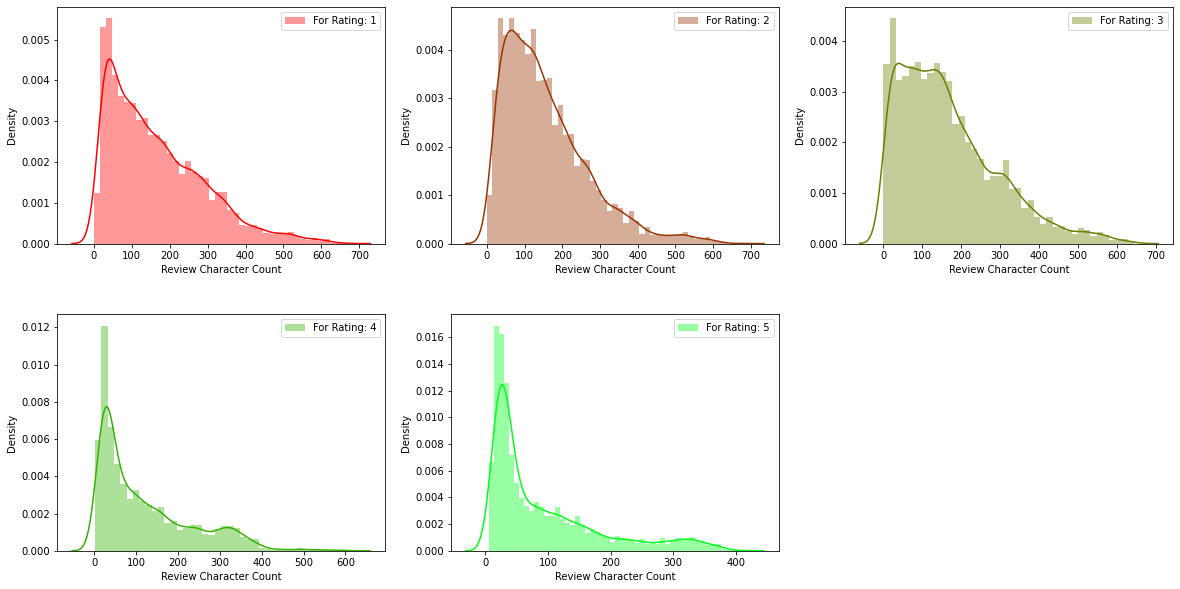

In [54]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
count=1
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.Review_character_count[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    count += 1
    
plt.show()

 - We noticed that for  every type rating, the character count distribution is highly right skewed.
 - Similarly most of character's count is falling in the range of 0 to 10.

### Checking Word cloud by Rating:

In [55]:
from wordcloud import WordCloud

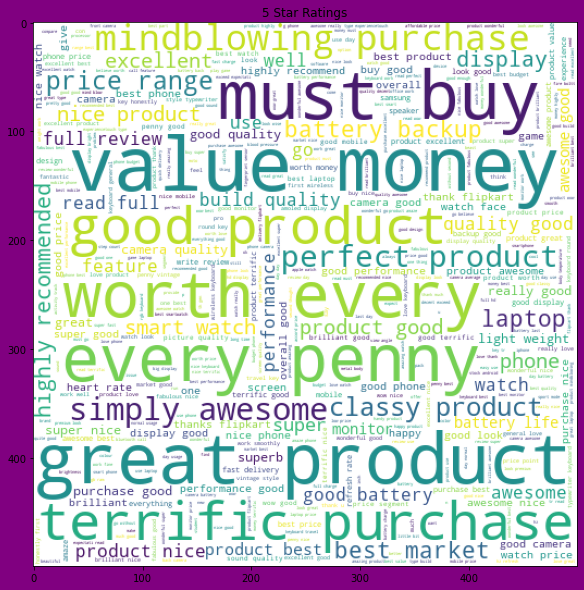

In [56]:
### 5 Star rating
star =df_new['Full_review'][df_new['Ratings']==5]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('5 Star Ratings')
plt.show()


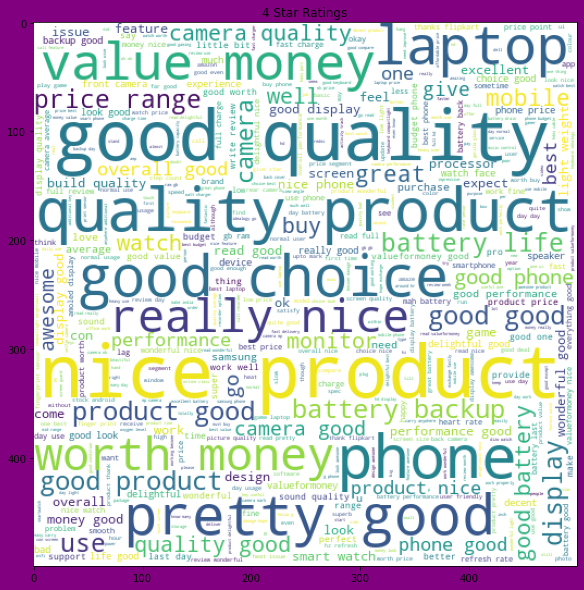

In [57]:
### 4 Star rating
star =df_new['Full_review'][df_new['Ratings']==4]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('4 Star Ratings')
plt.show()

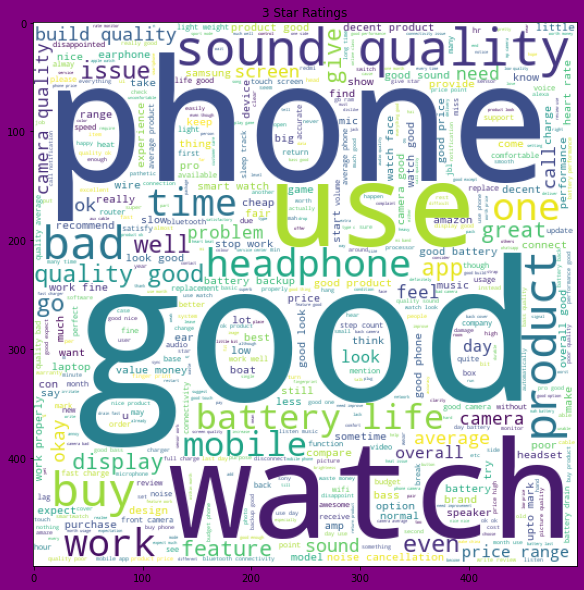

In [58]:
### 3 Star rating
star =df_new['Full_review'][df_new['Ratings']==3]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('3 Star Ratings')
plt.show()

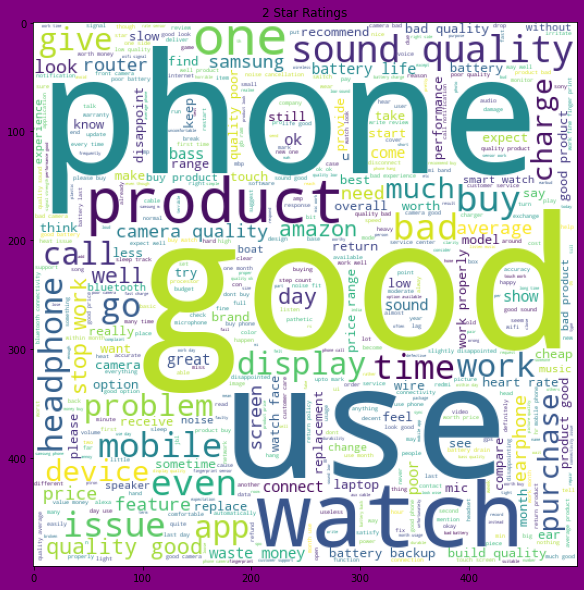

In [59]:
### 2 Star rating
star =df_new['Full_review'][df_new['Ratings']==2]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('2 Star Ratings')
plt.show()

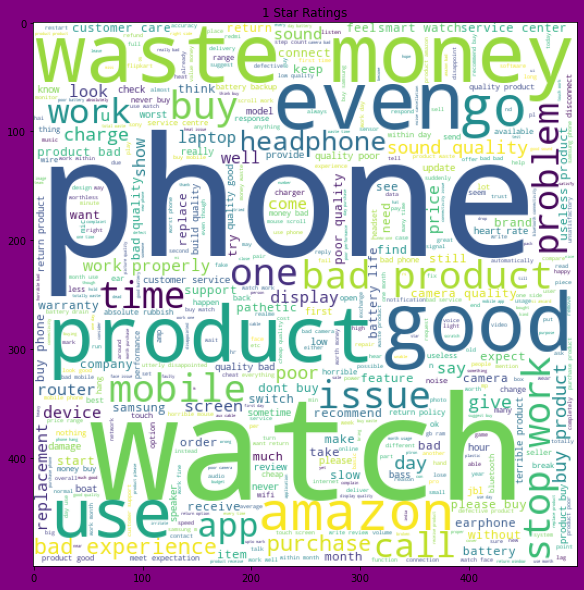

In [60]:
### 1 Star rating
star =df_new['Full_review'][df_new['Ratings']==1]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('1 Star Ratings')
plt.show()

### Observation of Word Cloud Visualization:-

`For Rating: 1`
It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc

`For Rating: 2`
It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

`For Rating: 3`
It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

`For Rating: 4`
It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

`For Rating: 5`
It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

## Model Building Phase:

In [61]:
### spliting the dataset:-
x=df_new['Full_review']
y=df_new['Ratings']

### Handling Imbalanced dataset:

In [62]:
### Value Counts
df_new['Ratings'].value_counts()

5    19941
1    11346
3     8849
4     7844
2     7368
Name: Ratings, dtype: int64

If we take 8000 records for every  star then our model will not look as imbalanced dataset.

In [63]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:8000]
df2 = df[df['Ratings']==2][0:8000]
df3 = df[df['Ratings']==3][0:8000]
df4 = df[df['Ratings']==4][0:8000]
df5 = df[df['Ratings']==5][0:8000]

In [64]:
### Adding all the dataframes:
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [66]:
df.Ratings.value_counts()

1    8000
3    8000
5    8000
4    7931
2    7539
Name: Ratings, dtype: int64

In [67]:
df.isna().sum()

Ratings                   0
Review_Text               0
Summary                   0
Full_review               0
new_review                0
Review_character_count    0
dtype: int64

In [68]:
### Importing necessary libraries:-



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [69]:
df_new

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incredible scared online pay...,47,286
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56,322
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop great buy product diw...,29,187
3,5,Brought this laptop after fair bit of research...,Terrific,terrific bring laptop fair bit research arguab...,22,164
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblowing purchase much well single core per...,24,154
...,...,...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,nice good,2,9
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,screen quality picture clarity good nd photo c...,16,106
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n",good phone battery drain fast overall good phone,8,48
56240,4,Good product,\r\n Very very like\r\n,like good product,3,17


In [70]:
### first converting the reveiw feature
vector = TfidfVectorizer(max_features=100000,smooth_idf=False, stop_words='english')

In [71]:
x = vector.fit_transform(df_new['Full_review'])
x

<55348x22792 sparse matrix of type '<class 'numpy.float64'>'
	with 834484 stored elements in Compressed Sparse Row format>

In [72]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Ratings, dtype: int32

In [73]:
### printing the training the testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (38743, 22792)
x_test (16605, 22792)
y_train (38743,)
y_test (16605,)


## `Defining a Function for best random State:`

In [74]:
### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [89]:
### Best Random STATE:
def Random_state(Model,Feature,Target):
    maximum_accu=0
    for i in range(11,36):
        x_train,x_test,y_train,y_test=train_test_split(Feature,Target,test_size=0.25,random_state=i)
        Model.fit(Feature,Target)
        train_pred=Model.predict(x_train)
        test_pred=Model.predict(x_test)
        accu_score=accuracy_score(y_test,test_pred)
        print("For Random State {}, the Accuracy Score is: {}".format(i,accu_score))
        if accu_score>maximum_accu:
            
            maximum_accu=accu_score
            j=i
    print("\n")        
    print(" The Highest Accuracy SCORE is: {}".format(maximum_accu))
    print("\n The Best Random State is:")
    return j

## `Defining a Function for Priting Accuracy:`

In [76]:
def print_score(clf,x,y,randomstate,train=True):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=randomstate)
    clf.fit(x_train,y_train)
    if train:
        y_pred= clf.predict(x_train)
        print("\n**********************************Training Score****************************************")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        print("\n *********************************Confusion Matrix**************************************")
        print(confusion_matrix(y_train,y_pred))
        
        print("\n \n Training Classification Report \n" ,classification_report(y_train,y_pred,digits=2))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n \n')
        print("\n*********************************Test Result**********************************************")
        print(f"Accuracy_Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n*********************************Confusion Matrix*****************************************")
        print(confusion_matrix(y_test,pred))
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

## `Defining A funtion for cross Validation:`

In [93]:
def cross_val(Model,independent,dependent,randomstate):
    x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.2,random_state=randomstate)
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    for i in range(3,4):
        cv_score=cross_val_score(Model,x,y,cv=i)
        cv_mean=cv_score.mean()
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_mean)
        print('Accuracy score is :- ',accuracy_score(y_test,pred))
        print('\n')

# 1. `Logistic Regression`

In [80]:
## random State
Random_state(LogisticRegression(),x,y)

For Random State 11, the Accuracy Score is: 0.8508347185083471
For Random State 12, the Accuracy Score is: 0.8497506684975067
For Random State 13, the Accuracy Score is: 0.8501120185011202
For Random State 14, the Accuracy Score is: 0.8500397485003974
For Random State 15, the Accuracy Score is: 0.8515574185155742
For Random State 16, the Accuracy Score is: 0.8499674784996748
For Random State 17, the Accuracy Score is: 0.8475825684758257
For Random State 18, the Accuracy Score is: 0.84823299848233
For Random State 19, the Accuracy Score is: 0.8470766784707667
For Random State 20, the Accuracy Score is: 0.8487388884873889
For Random State 21, the Accuracy Score is: 0.8506179085061791
For Random State 22, the Accuracy Score is: 0.8510515285105152
For Random State 23, the Accuracy Score is: 0.8464262484642625
For Random State 24, the Accuracy Score is: 0.8481607284816073
For Random State 25, the Accuracy Score is: 0.8520633085206331
For Random State 26, the Accuracy Score is: 0.85090698850

41

In [81]:
print_score(LogisticRegression(),x,y,41,train=True)
print_score(LogisticRegression(),x,y,41,train=False)


**********************************Training Score****************************************
Accuracy Score : 84.85%

 *********************************Confusion Matrix**************************************
[[ 7937   555   402    67    33]
 [ 1382  3553   838   122    54]
 [  690   678  5196   343   175]
 [   75    67   340  5126   616]
 [   14    10    39   209 15757]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.79      0.88      0.83      8994
           2       0.73      0.60      0.66      5949
           3       0.76      0.73      0.75      7082
           4       0.87      0.82      0.85      6224
           5       0.95      0.98      0.96     16029

    accuracy                           0.85     44278
   macro avg       0.82      0.80      0.81     44278
weighted avg       0.85      0.85      0.85     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:

In [82]:
cross_val(LogisticRegression(),x,y,41)

At cv :-  2
Cross Validation score is :-  0.6188660836886608
Accuracy score is :-  0.7924119241192412


At cv :-  3
Cross Validation score is :-  0.6546031274575488
Accuracy score is :-  0.7924119241192412


At cv :-  4
Cross Validation score is :-  0.6672327816723278
Accuracy score is :-  0.7924119241192412


At cv :-  5
Cross Validation score is :-  0.6941885126744182
Accuracy score is :-  0.7924119241192412


At cv :-  6
Cross Validation score is :-  0.6966096985124232
Accuracy score is :-  0.7924119241192412


At cv :-  7
Cross Validation score is :-  0.7159953863028894
Accuracy score is :-  0.7924119241192412


At cv :-  8
Cross Validation score is :-  0.7166636378762036
Accuracy score is :-  0.7924119241192412


At cv :-  9
Cross Validation score is :-  0.7204579001175712
Accuracy score is :-  0.7924119241192412




# 2. `Decision Tree Classifier`

In [83]:
## random State
Random_state(DecisionTreeClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.9929175399291754
For Random State 12, the Accuracy Score is: 0.9933511599335116
For Random State 13, the Accuracy Score is: 0.9932066199320662
For Random State 14, the Accuracy Score is: 0.994941099949411
For Random State 15, the Accuracy Score is: 0.9939293199392932
For Random State 16, the Accuracy Score is: 0.99277299992773
For Random State 17, the Accuracy Score is: 0.9919780299197803
For Random State 18, the Accuracy Score is: 0.9937125099371251
For Random State 19, the Accuracy Score is: 0.993495699934957
For Random State 20, the Accuracy Score is: 0.9930620799306208
For Random State 21, the Accuracy Score is: 0.9937125099371251
For Random State 22, the Accuracy Score is: 0.9932788899327889
For Random State 23, the Accuracy Score is: 0.9925561899255619
For Random State 24, the Accuracy Score is: 0.9936402399364024
For Random State 25, the Accuracy Score is: 0.992050299920503
For Random State 26, the Accuracy Score is: 0.99400158994001

14

In [84]:
### printing the scores:
print_score(DecisionTreeClassifier(),x,y,14,train=True)
print_score(DecisionTreeClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.34%

 *********************************Confusion Matrix**************************************
[[ 9033     5     3     6     2]
 [   21  5813     7    16     0]
 [   15     9  6959    61     8]
 [    2     3    20  6139   104]
 [    0     0     0    11 16041]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9049
           2       1.00      0.99      0.99      5857
           3       1.00      0.99      0.99      7052
           4       0.98      0.98      0.98      6268
           5       0.99      1.00      1.00     16052

    accuracy                           0.99     44278
   macro avg       0.99      0.99      0.99     44278
weighted avg       0.99      0.99      0.99     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [85]:
cross_val(DecisionTreeClassifier(),x,y,14)

At cv :-  2
Cross Validation score is :-  0.5669220206692203
Accuracy score is :-  0.8176151761517615


At cv :-  3
Cross Validation score is :-  0.618016921376506
Accuracy score is :-  0.8176151761517615


At cv :-  4
Cross Validation score is :-  0.6498699139986992
Accuracy score is :-  0.8176151761517615


At cv :-  5
Cross Validation score is :-  0.692653259920138
Accuracy score is :-  0.8176151761517615


At cv :-  6
Cross Validation score is :-  0.6976396322072501
Accuracy score is :-  0.8176151761517615


At cv :-  7
Cross Validation score is :-  0.7196444366494114
Accuracy score is :-  0.8176151761517615


At cv :-  8
Cross Validation score is :-  0.7306838561780912
Accuracy score is :-  0.8176151761517615


At cv :-  9
Cross Validation score is :-  0.7273767827936859
Accuracy score is :-  0.8176151761517615




# 3. `RandomForest Classifier`

In [88]:
### printing the scores:
print_score(RandomForestClassifier(),x,y,15,train=True)
print_score(RandomForestClassifier(),x,y,15,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.32%

 *********************************Confusion Matrix**************************************
[[ 9053    11     8     4     2]
 [   17  5845    20     2     0]
 [   16    13  6985    24     7]
 [    1     7    54  6082   106]
 [    0     0     2     9 16010]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9078
           2       0.99      0.99      0.99      5884
           3       0.99      0.99      0.99      7045
           4       0.99      0.97      0.98      6250
           5       0.99      1.00      1.00     16021

    accuracy                           0.99     44278
   macro avg       0.99      0.99      0.99     44278
weighted avg       0.99      0.99      0.99     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [91]:
cross_val(RandomForestClassifier(),x,y,15)

At cv :-  5
Cross Validation score is :-  0.74130886466211
Accuracy score is :-  0.8586269196025293




# 4. `AdaBoost Classifier`

In [92]:
### printing the scores:
print_score(AdaBoostClassifier(),x,y,15,train=True)
print_score(AdaBoostClassifier(),x,y,15,train=False)


**********************************Training Score****************************************
Accuracy Score : 66.48%

 *********************************Confusion Matrix**************************************
[[ 7718   129  1055    70   106]
 [ 3815   128  1655   151   135]
 [ 2663   136  3350   565   331]
 [  236    18  1265  3885   846]
 [  251   113   340   964 14353]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.53      0.85      0.65      9078
           2       0.24      0.02      0.04      5884
           3       0.44      0.48      0.46      7045
           4       0.69      0.62      0.65      6250
           5       0.91      0.90      0.90     16021

    accuracy                           0.66     44278
   macro avg       0.56      0.57      0.54     44278
weighted avg       0.64      0.66      0.63     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [94]:
cross_val(AdaBoostClassifier(),x,y,15)

At cv :-  3
Cross Validation score is :-  0.6179265802848283
Accuracy score is :-  0.6603432700993677




# 5. `Gradient Boosting Classifier`

In [96]:
### printing the scores:
print_score(GradientBoostingClassifier(),x,y,15,train=True)
print_score(GradientBoostingClassifier(),x,y,15,train=False)


**********************************Training Score****************************************
Accuracy Score : 76.70%

 *********************************Confusion Matrix**************************************
[[ 7598   722   573    78   107]
 [ 2145  2226  1193   139   181]
 [ 1180   847  4182   404   432]
 [  130    87   585  4583   865]
 [  116    25   128   378 15374]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.84      0.75      9078
           2       0.57      0.38      0.45      5884
           3       0.63      0.59      0.61      7045
           4       0.82      0.73      0.77      6250
           5       0.91      0.96      0.93     16021

    accuracy                           0.77     44278
   macro avg       0.72      0.70      0.70     44278
weighted avg       0.76      0.77      0.76     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [97]:
cross_val(GradientBoostingClassifier(),x,y,15)

At cv :-  3
Cross Validation score is :-  0.6569520232611761
Accuracy score is :-  0.7525745257452574




# 6. `ExtraTree Classifier`

In [99]:
### printing the scores:
print_score(ExtraTreesClassifier(),x,y,15,train=True)
print_score(ExtraTreesClassifier(),x,y,15,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.32%

 *********************************Confusion Matrix**************************************
[[ 9059     7     6     4     2]
 [   21  5844    17     2     0]
 [   18    16  6986    19     6]
 [    1     7    59  6081   102]
 [    0     0     3    13 16005]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9078
           2       0.99      0.99      0.99      5884
           3       0.99      0.99      0.99      7045
           4       0.99      0.97      0.98      6250
           5       0.99      1.00      1.00     16021

    accuracy                           0.99     44278
   macro avg       0.99      0.99      0.99     44278
weighted avg       0.99      0.99      0.99     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [100]:
cross_val(ExtraTreesClassifier(),x,y,15)

At cv :-  3
Cross Validation score is :-  0.6689849911200794
Accuracy score is :-  0.8579042457091237




# 7. `GaussianNB Classifier`

In [102]:
### printing the scores:
print_score(MultinomialNB(),x,y,15,train=True)
print_score(MultinomialNB(),x,y,15,train=False)


**********************************Training Score****************************************
Accuracy Score : 72.61%

 *********************************Confusion Matrix**************************************
[[ 8334    44   373     8   319]
 [ 2648  1373  1185    23   655]
 [ 1282    77  4297    30  1359]
 [  168    11   322  2187  3562]
 [   19     1    39     3 15959]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.67      0.92      0.77      9078
           2       0.91      0.23      0.37      5884
           3       0.69      0.61      0.65      7045
           4       0.97      0.35      0.51      6250
           5       0.73      1.00      0.84     16021

    accuracy                           0.73     44278
   macro avg       0.79      0.62      0.63     44278
weighted avg       0.77      0.73      0.69     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [103]:
cross_val(MultinomialNB(),x,y,15)

At cv :-  3
Cross Validation score is :-  0.606977468538846
Accuracy score is :-  0.6869918699186992




# 8. `XGB`

In [104]:
### printing the scores:
print_score(XGBClassifier(),x,y,15,train=True)
print_score(XGBClassifier(),x,y,15,train=False)

[11:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

**********************************Training Score****************************************
Accuracy Score : 87.82%

 *********************************Confusion Matrix**************************************
[[ 8170   512   312    51    33]
 [ 1244  3881   639    83    37]
 [  606   608  5506   241    84]
 [   62    57   270  5523   338]
 [   18    18    30   151 15804]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.81      0.90      0.85      9078
           2       0.76      0.66      0.71      5884
           3       0.81      0.78      0.80      7045
           4       0.91      0.88      0.90      6250
           

## Cross Validation:-

In [105]:
cross_val(XGBClassifier(),x,y,15)

[11:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# 9. `LGBMClassifier:`

In [106]:
### printing the scores:
print_score(LGBMClassifier(),x,y,15,train=True)
print_score(LGBMClassifier(),x,y,15,train=False)


**********************************Training Score****************************************
Accuracy Score : 87.90%

 *********************************Confusion Matrix**************************************
[[ 8079   533   381    51    34]
 [ 1231  3860   677    79    37]
 [  574   605  5534   241    91]
 [   52    39   255  5530   374]
 [   14     8    18    63 15918]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.81      0.89      0.85      9078
           2       0.77      0.66      0.71      5884
           3       0.81      0.79      0.80      7045
           4       0.93      0.88      0.91      6250
           5       0.97      0.99      0.98     16021

    accuracy                           0.88     44278
   macro avg       0.86      0.84      0.85     44278
weighted avg       0.88      0.88      0.88     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [107]:
cross_val(LGBMClassifier(),x,y,15)

At cv :-  3
Cross Validation score is :-  0.6752362750252252
Accuracy score is :-  0.8202348690153568




## `Conclusion:`
#### As we noticed that every model's training score showing greate as well as testing score. But after checking the Cross validation we face the reality of our models. Every model is extremely over fitted.

### After Checking the Cross Validation we observe that  `RandomForestClassifier` models showing highest accuracy among all of them.
#### Now,  we will do Some tunning for this model. Let's Check if we increase their accuracy or not.

## `HyperParameter Tunning:`

##  Random Forest Classifier:-

In [110]:
 ##Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv=3, verbose=3,n_jobs=-1)
GSCV.fit(x_train, y_train)

In [111]:
print(GSCV.best_params_)

In [121]:
### Model Evaluation

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=15)

rf=RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=800,bootstrap=False)

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_pred))
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, y_pred)}")





***********************Testing Scores******************************

Accuracy score for testing is :  0.8548818385488184

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.75      0.92      0.83      2836
           2       0.76      0.55      0.64      1842
           3       0.77      0.74      0.75      2235
           4       0.96      0.83      0.89      1982
           5       0.95      0.99      0.97      4942

    accuracy                           0.85     13837
   macro avg       0.84      0.81      0.82     13837
weighted avg       0.86      0.85      0.85     13837


CONFUSION MATRIX: 
 [[2609  103  104    9   11]
 [ 524 1018  265   10   25]
 [ 295  201 1649   36   54]
 [  39   18  117 1652  156]
 [   8    3   14   16 4901]]


In [122]:
import scikitplot as sktplt

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

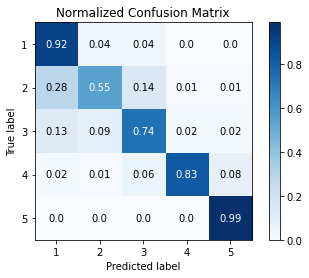

In [125]:
## Visualize the confusion matrix:
sktplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

## `Random Forest` Accuracy is 85%

## Saving The model:

In [129]:
import joblib
joblib.dump(rf,"Rating_prediction.pkl")

['Rating_prediction.pkl']

## `Actual Vs Predicted:`

In [130]:
original=np.array(y_test)
predicted=np.array(rf.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,4,4
1,4,4
2,1,1
3,5,5
4,1,3
...,...,...
13832,1,1
13833,1,1
13834,1,1
13835,5,5
